# Hyperparameters

When we define the model, we can specify the hyperparameters. In practice, the most common ones are

- max_depth: The maximum number of levels in the tree.
- min_samples_leaf: The minimum number of samples allowed in a leaf.
- min_samples_split: The minimum number of samples required to split an internal node.
- max_features : The number of features to consider when looking for the best split.

For example, here we define a model where the maximum depth of the trees max_depth is 7, and the minimum number of elements in each leaf min_samples_leaf is 10.

In [10]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier()

# TODO: Fit the model.
model.fit(X,y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y,y_pred)
acc

1.0

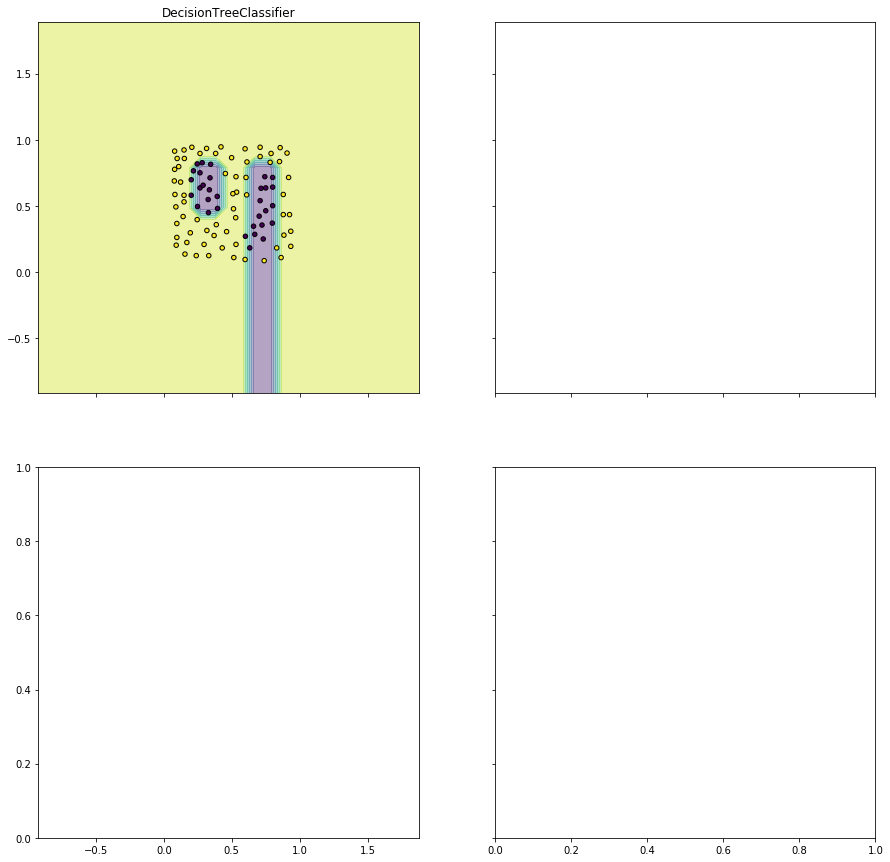

In [11]:
from itertools import product
import matplotlib.pyplot as plt
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(15,15))

for idx, clf, tt in zip(product([0, 1], [0, 1]),[model],['DecisionTreeClassifier']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()